In [1]:
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16
import numpy as np
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt
import imageio
from PIL import Image
import cv2
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

In [2]:
#size = 600, 400
#im = Image.open("try.jpg")
#im_resized = im.resize(size, Image.ANTIALIAS)
#im_lab = cv2.cvtColor(np.array(im_resized),cv2.COLOR_BGR2LAB)##LAB dimensions kullanılacak.
#im_lab_np = np.array(im_lab)
#grayscale_img = im_lab[:,:,0]
#np_grayscale_img = np.array(grayscale_img)

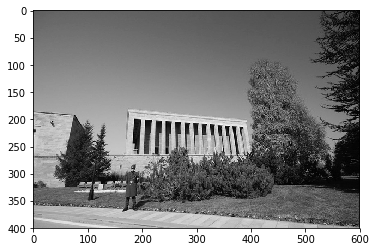

In [3]:
#plt.imshow(np_grayscale_img, cmap='gray', vmin=0, vmax=255)

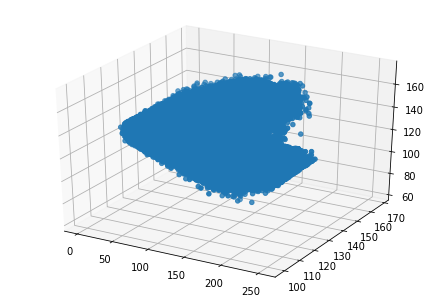

In [5]:
#get rgb values from image to 1D array
#l, a, b = cv2.split(im_lab)
#luminance = l.flatten()
#alpha = a.flatten()
#beta = b.flatten()

#plotting 
#fig = plt.figure()
#ax = Axes3D(fig)
#ax.scatter(luminance, alpha, beta)
#plt.show()

In [7]:
#kmeans = KMeans(30)
#print(im_lab_np.shape)

(400, 600, 3)


In [8]:
#kmeans.fit(im_lab_np.reshape((-1,3)))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=30, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [9]:
#labels = kmeans.labels_ ## karşılık gelen labeller

In [10]:
#print(kmeans.labels_)

[ 7  7  7 ... 21 21 21]


In [52]:
#centers = kmeans.cluster_centers_ ## labellara karşılık gelen renkler
#print(centers)

[[ 91.35586592 111.59240223 125.76849162]
 [178.58554817 126.02353267 122.7923588 ]
 [117.45276578 148.5280758  159.54716455]
 [  9.48690729 127.06751592 127.44005662]
 [160.49003834 145.85369521 160.97955041]
 [ 86.01851036 130.99250771  96.51851036]
 [205.09151488 122.25825559 110.08396268]
 [ 95.90299244 147.26872739 155.76685301]
 [ 95.53202507 125.81275552 119.7756882 ]
 [133.97932726 125.25297828 101.1874562 ]
 [145.12458946 147.28666286 161.23968299]
 [109.07222941 128.44825356  97.23329021]
 [ 57.53077185 120.41550493 123.82590955]
 [130.22654492 147.7566716  160.03221658]
 [ 84.50210164 145.48777226 152.20634314]
 [ 25.60267251 125.17820232 126.907506  ]
 [108.11327707 112.19671936 124.45643647]
 [184.45886386 142.47502449 158.66748286]
 [166.22744681 123.20468085 103.84446809]
 [222.95481336 124.57531107 121.20006549]
 [187.50007963 122.39512661 106.57413601]
 [156.18565525 124.85714286 123.50413223]
 [198.47358491 125.91857765 123.26269956]
 [105.83661766 148.08760905 157.63

In [46]:
##Renklendir yeni imageyi test et
#count = 0
#new_image = np.zeros((400,600,3))
#for i in range (400):
#   for k in range(600):
  #      new_image[i,k,:] =  centers[labels[count]]
  #      count += 1

In [47]:
from skimage.color import rgb2lab, lab2rgb

In [48]:
#important for color conversion
#0 > L > 100 ⇒ OpenCV range = L*255/100 (1 > L > 255)
#-127 > a > 127 ⇒ OpenCV range = a + 128 (1 > a > 255)
#-127 > b > 127 ⇒ OpenCV range = b + 128 (1 > b > 255)


In [71]:
#new_image_show = np.zeros((400,600,3)) 
#new_image_show[:,:,0] = new_image[:,:,0] *100 /255
#new_image_show[:,:,1] =new_image[:,:,1] - 128
#new_image_show[:,:,2] =new_image[:,:,2] - 128

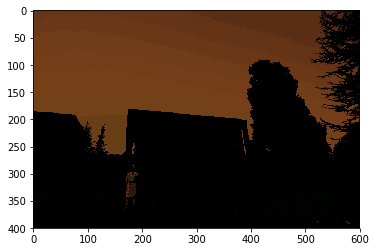

In [70]:
#plt.imshow(lab2rgb(new_image_show))

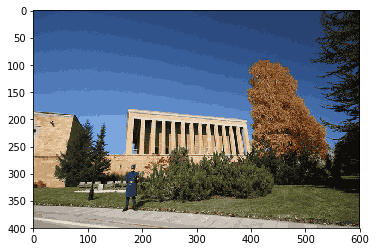

In [80]:
#a = lab2rgb(new_image_show)
#plt.imshow(np.flip(a,axis=2))##ters olarak döndürüyor bu lab 2rgb fonksiyonu o yüzden dikkat et 

In [1]:
def create_label(img_lab, number):
    kmeans = KMeans(number)
    kmeans.fit(img_lab.reshape((-1,3)))
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    return labels,centers

array([[[0.16470588, 0.27843137, 0.49803922],
        [0.15686275, 0.27058824, 0.49019608],
        [0.15686275, 0.27058824, 0.49019608],
        ...,
        [0.05490196, 0.0627451 , 0.01568627],
        [0.05490196, 0.0627451 , 0.02745098],
        [0.04313725, 0.04313725, 0.03529412]],

       [[0.16078431, 0.2745098 , 0.49411765],
        [0.15294118, 0.27058824, 0.49019608],
        [0.15686275, 0.2745098 , 0.49019608],
        ...,
        [0.03921569, 0.04313725, 0.04705882],
        [0.05098039, 0.05098039, 0.04313725],
        [0.04313725, 0.05098039, 0.01960784]],

       [[0.15294118, 0.28235294, 0.49411765],
        [0.15294118, 0.28235294, 0.49411765],
        [0.15294118, 0.28235294, 0.49411765],
        ...,
        [0.01960784, 0.03529412, 0.04313725],
        [0.03529412, 0.04705882, 0.04705882],
        [0.03529412, 0.05490196, 0.03529412]],

       ...,

       [[0.57254902, 0.57254902, 0.56470588],
        [0.57254902, 0.57254902, 0.56470588],
        [0.57647059, 0